In [16]:
import numpy as np 
from scipy.io import loadmat
import sys 
import os

def set_path():
    if sys.platform == 'darwin':
        print("Current system is macOS")
        main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
    elif sys.platform == 'linux':
        print("Current system is Ubuntu")
        main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
    else:
        print("Current system is neither macOS nor Ubuntu")
    os.chdir(main_fold_path)
set_path()

data_fold = 'Prerequisite/data_all_original'

Hb_types = ['HbO', 'HbR', 'HbT']

# test one 

# data_pth = 'Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/all52CH_prep_HbO.mat'
# data = loadmat(data_pth)

def read_hb_data_label(data): 
    hb_data = data.get('data_hb')
    label = data.get('label')
    return hb_data, label

    
def loop_data_path_hb_type(data_pth):
    all_hb_data, label = [], []
    for hb_type in Hb_types:
        path = data_pth + f'/all52CH_prep_{hb_type}.mat'
        print(path)
        data = loadmat(path)
        hb_data, label = read_hb_data_label(data)
        all_hb_data.append(hb_data)
        label = label
    return all_hb_data, label
        


# correct channel 
def correct_channel(data):
    map_location = 'allData/diagnosis/Channel_Configuration.mat'
    channel_map = loadmat(map_location)
    all_channel = [ch[0] for ch in channel_map['Channel'][0][0][0][0]] # ['C29', 'C39', 'C18', 'C28', 'C30', 'C31', 'C41', 'C20', 'C43', 'C32', 'C44', 'C45', 'C34', 'C46', 'C47', 'C36', 'C48', 'C49', 'C38', 'C40', 'C50', 'C51', 'C42', 'C52', 'C1', 'C11', 'C2', 'C3', 'C13', 'C4', 'C5', 'C15', 'C6', 'C7', 'C17', 'C19', 'C8', 'C9', 'C21', 'C10', 'C12', 'C33', 'C22', 'C23', 'C35', 'C14', 'C24', 'C25', 'C37', 'C16', 'C26', 'C27']
    correct_location = [all_channel.index('C'+str(i)) for i in range(1, 53)] # [index_of_'C1', index_of_'C2', index_of_'C3', ...]
    data = data[:, correct_location, ...]
    return data


save_fold = 'allData/diagnosis514/'        
dataset_1_pth = 'Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel/'        
dataset_2_pth = 'Prerequisite/data_all_original/Fabeha_s Data/All 52-channel/'        



Current system is Ubuntu


In [17]:
# For each dataset, raw/prep HbO/HbR/HbT have the same subject name including order
cyrus_sub_name = loadmat(dataset_1_pth + 'all52CH_raw_HbO.mat')['subject_name']
fabeha_sub_name = loadmat(dataset_2_pth + 'all52CH_raw_HbO.mat')['subject_name']
fabeha_sub_name = [ 'Fabeha_' + i[0] for i in fabeha_sub_name[0, :]]
cyrus_sub_name = [ 'Cyrus_' + i[0][:-4] for i in cyrus_sub_name[0, :]]

In [26]:

hamd_path = 'Prerequisite/HAM-D Scores.mat'
hamd = loadmat(hamd_path)
subject_id_names = [ i[0] for i in hamd['subject_ids'][:, 0]]
hamd = [ i for i in hamd['hamd_score'][:, 0]]

subject_to_hamd_dict = {}
for i in range(len(hamd)):
    subject_to_hamd_dict[subject_id_names[i]] = hamd[i]
    
print(subject_to_hamd_dict)    
# data['subject_name']

# Cyrus Febeha
can_not_find = []

for i in fabeha_sub_name + cyrus_sub_name:
    if i not in subject_to_hamd_dict:
        # can_not_find.append(i)
        for name_in_hamd in subject_to_hamd_dict:
            if name_in_hamd == i[:len(name_in_hamd)]:
                print(f"can find {i} | replace with {name_in_hamd} | with score of {subject_to_hamd_dict[name_in_hamd]}")
                subject_to_hamd_dict[i] = subject_to_hamd_dict[name_in_hamd]
                break


for i in fabeha_sub_name + cyrus_sub_name:
    if i not in subject_to_hamd_dict:
        can_not_find.append(i)
print(can_not_find)       


# Goal generate a shape including the correct order of label and hamd score 

delete_subejct_name = 'Cyrus_CT033'

two_dataset_correct_order_name = cyrus_sub_name + fabeha_sub_name

delete_index_in_gabrille = np.where(np.array(two_dataset_correct_order_name) == delete_subejct_name)[0][0]

two_dataset_correct_order_name.remove(delete_subejct_name)




{'Fabeha_DEP001': 18, 'Fabeha_DEP002': 37, 'Fabeha_DEP003': 26, 'Fabeha_DEP004': 22, 'Fabeha_DEP005': 6, 'Fabeha_DEP006': 5, 'Fabeha_DEP009': 30, 'Fabeha_DEP010': 25, 'Fabeha_DEP011': 23, 'Fabeha_DEP012': 18, 'Fabeha_DEP013': 16, 'Fabeha_DEP015': 46, 'Fabeha_DEP016': 37, 'Fabeha_DEP017': 9, 'Fabeha_DEP018': 36, 'Fabeha_DEP019': 8, 'Fabeha_DEP021': 12, 'Fabeha_DEP022': 22, 'Fabeha_DEP023': 16, 'Fabeha_DEP024': 25, 'Fabeha_DEP026': 2, 'Fabeha_DEP027': 22, 'Fabeha_DEP029': 25, 'Fabeha_DEP030': 32, 'Fabeha_DEP031': 3, 'Fabeha_DEP032': 23, 'Fabeha_DEP033': 12, 'Fabeha_DEP034': 5, 'Fabeha_DEP035': 10, 'Fabeha_DEP036': 25, 'Fabeha_DEP037': 19, 'Fabeha_DEP038': 32, 'Fabeha_DEP039': 1, 'Fabeha_DEP040': 24, 'Fabeha_DEP041': 13, 'Fabeha_DEP043': 10, 'Fabeha_DEP044': 27, 'Fabeha_DEP045': 23, 'Fabeha_DEP046': 10, 'Fabeha_DEP047': 35, 'Fabeha_DEP048': 34, 'Fabeha_DEP049': 15, 'Fabeha_DEP050': 18, 'Fabeha_DEP051': 24, 'Fabeha_DEP052': 8, 'Fabeha_DEP053': 22, 'Fabeha_DEP054': 33, 'Fabeha_DEP055': 23, 

: 

In [4]:


hb_data_dataset1, label_dataset1 = loop_data_path_hb_type(dataset_1_pth)
hb_data_dataset2, label_dataset2 = loop_data_path_hb_type(dataset_2_pth)

hb_data_dataset1 = np.array(hb_data_dataset1)
hb_data_dataset2 = np.array(hb_data_dataset2)
hb_data_all = np.concatenate((hb_data_dataset1, hb_data_dataset2), axis=1)
hb_data_all = np.transpose(hb_data_all, (1,2,3,0))

label_dataset1 = np.array(label_dataset1)
label_dataset2 = np.array(label_dataset2)
label_all = np.concatenate((label_dataset1, label_dataset2), axis=0)[:, 0]


# delete data with index 32 in gabreille
# Gabrielle - CT-033 == 32 -index delete it [to answer why delete it?]
# Fabeha has 374, Gabrielle has 141, fabrielle will be the first 

hb_data_all = np.delete(hb_data_all, delete_index_in_gabrille, axis=0)
label_all = np.delete(label_all, delete_index_in_gabrille, axis=0)


hb_data_all = correct_channel(hb_data_all)

hb_data_all_3d = hb_data_all
# normalize data by dividing by mean values, and concatenate them together
# hb_data_all = np.concatenate([hb_data_all[..., i] / np.mean(hb_data_all[..., i]) for i in range(3)], axis=2)
hb_data_all = np.concatenate([hb_data_all_3d[..., i] for i in range(3)], axis=2)

# me


# save data
np.save(save_fold + 'hb_data.npy', hb_data_all)
np.save(save_fold + 'label.npy', label_all)


def avg_ten_points(hb):
    hb = np.mean(hb.reshape(hb.shape[0], hb.shape[1], hb.shape[2]//10, 10), axis=-1)
    return hb

# average along -1 by every 10pionts 
hbo = avg_ten_points(hb_data_all_3d[...,:-1,0])

hbr = avg_ten_points(hb_data_all_3d[...,:-1,1])

print(hbr.shape)
hbt = avg_ten_points(hb_data_all_3d[...,:-1,2])
np.save(save_fold + 'hbo_simple_data.npy', hbo)

hb_simple_3d = np.concatenate([hbo[..., np.newaxis], hbr[..., np.newaxis], hbt[..., np.newaxis]], axis=-1)
np.save(save_fold + 'hb_simple_3d.npy', hb_simple_3d)




hbo.shape

Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel//all52CH_prep_HbO.mat
Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel//all52CH_prep_HbR.mat
Prerequisite/data_all_original/Gabrielle_s Data/All 52-channel//all52CH_prep_HbT.mat
Prerequisite/data_all_original/Fabeha_s Data/All 52-channel//all52CH_prep_HbO.mat
Prerequisite/data_all_original/Fabeha_s Data/All 52-channel//all52CH_prep_HbR.mat
Prerequisite/data_all_original/Fabeha_s Data/All 52-channel//all52CH_prep_HbT.mat
(514, 52, 125)


(514, 52, 125)

In [5]:
two_dataset_correct_order_name, subject_to_hamd_dict, label_all

count = 0 
abnormal_label0_count = 0 
abnormal_label0_index = []
abnormal_label1_count = 0
abnormal_label1_index = []

for i, subject_name in enumerate(two_dataset_correct_order_name):
    sub_label = label_all[i]
    sub_hamd = subject_to_hamd_dict[subject_name]
    # print(f" {subject_name} - HAM-D: {sub_hamd} - {sub_label}")
    
    if (sub_hamd >= 8 and sub_label == 1) or (sub_hamd < 8 and sub_label == 0):
        continue
    else:
        if sub_label == 0 : 
            abnormal_label0_count += 1
            abnormal_label0_index.append(i)
        else: 
            abnormal_label1_count += 1
            abnormal_label1_index.append(i)
            
        # print(f" {subject_name} - HAM-D: {sub_hamd} - {sub_label}")
        count +=1 
        
        
        
print('Total abnormal data:', count)
print("Abnormal label 0:", abnormal_label0_count)
print("Abnormal label 1:", abnormal_label1_count)
print('Total normal data:', len(label_all) - count)
        

Total abnormal data: 59
Abnormal label 0: 23
Abnormal label 1: 36
Total normal data: 455


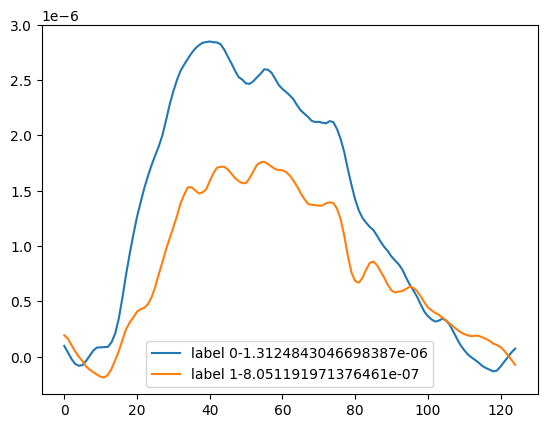

In [6]:
""" 
Important:

Patients with MDD are diagnosed according to DSM-5. HAM-D score is used to evaluate the severity of depression.

Some patients with label = 0 have HAM-D score >= 8, should still be considered as 0 (HC).

Some patients with label = 1 have HAM-D score < 8, should still be considered as 0 (MDD).
"""

import matplotlib.pyplot as plt
abnormal_label0_index, abnormal_label1_index
abnormal_hbo_label0 = hbo[abnormal_label0_index]
abnormal_hbo_label1 = hbo[abnormal_label1_index]

plt.plot(abnormal_hbo_label0.mean(axis=(0, 1)), label='label 0-' + str(np.mean(abnormal_hbo_label0.mean(axis=(0, 1, 2)))))
plt.plot(abnormal_hbo_label1.mean(axis=(0, 1)), label='label 1-' + str(np.mean(abnormal_hbo_label1.mean(axis=(0, 1, 2)))))
plt.legend()


In [7]:
import numpy as np

# for i in range(hbo.shape[0]):
#     # if i % 10 == 0:
#     #     plt.figure()
#     # plt.plot(hbo[i].mean(axis=(0)))
#     print(hbo[i].mean(axis=(0,1)))

all_sub_mean_hbo = hbo.mean(axis=(1,2))
threshold = 1e-7
print(all_sub_mean_hbo[np.abs(all_sub_mean_hbo) < threshold])
print(len(all_sub_mean_hbo[np.abs(all_sub_mean_hbo) < threshold]))
# plt.plot()

array = all_sub_mean_hbo
indices_abs_less_than_threshold = np.where(np.abs(array) < threshold)[0]
indices_less_than_threshold = np.where(array < threshold)[0]

indices_less_than_threshold.shape, indices_abs_less_than_threshold.shape



[-2.84189612e-08 -4.30451472e-08 -9.67312479e-08 -8.44331469e-08
  3.78074528e-08  2.53781544e-08  7.44050303e-08 -4.19033343e-08
 -4.76513132e-08 -6.31200188e-08  3.31452542e-09  3.06092879e-08
 -1.57318555e-08  9.18178428e-08 -2.21451234e-08  8.01718514e-08
 -5.64868017e-08 -7.05366009e-08 -3.73140425e-08 -3.44522358e-08
 -7.23082033e-08 -6.17683718e-08 -7.25723705e-08  2.04653557e-08
  8.95730536e-08 -8.64022785e-08 -3.82147253e-08 -5.45679293e-08
 -6.03090739e-08  4.24363302e-08  3.86367205e-09]
31


((108,), (31,))

In [ ]:

def select_data(arr1, arr2=None, index=None):
    retain_arr = [i for i in range(arr1.shape[0]) if i not in index]
    if arr2 is not None:
        return arr1[retain_arr], arr2[retain_arr]
    else:
        return arr1[retain_arr]

    # data = np.delete(data, )
    # label = np.delete(label, index)

# for select_index in [indices_less_than_threshold, indices_abs_less_than_threshold]:
    
#     selected_data, selected_label = select_data(hbo, label_all, select_index)
#     subject_length = selected_label.shape[0]
#     save_fold = f'allData/diagnosis_{subject_length}_less_than_threshold/' 
#     if not os.path.exists(save_fold):
#         os.makedirs(save_fold)
#     np.save(save_fold + 'hb_data.npy', selected_data)
#     np.save(save_fold + 'label.npy', selected_label)

#     print(selected_data.shape, selected_label.shape)

In [ ]:
# save last 110 subjects from the best fabeha dataset 
save_num_of_subjects = 110

hb_all = np.concatenate((hbo, hbr, hbt), axis=-1)

select_index = [i for i in range(save_num_of_subjects)]
select_index = hb_all.shape[0] - 1 - np.array(select_index)

selected_data, selected_label = select_data(hb_all, label_all, select_index)
save_fold = 'allData/diagnosis_110_fabeha_dataset_hb_all/'
np.save(save_fold + 'hb_data.npy', selected_data)
np.save(save_fold + 'label.npy', selected_label)
# selected_data, selected_label = select_data(hbo, label_all, select_index)
# subject_length = selected_label.shape[0]
# save_fold = f'allData/diagnosis_{subject_length}_less_than_threshold/' 
# if not os.path.exists(save_fold):
#     os.makedirs(save_fold)
# np.save(save_fold + 'hb_data.npy', selected_data)
# np.save(save_fold + 'label.npy', selected_label)

# print(selected_data.shape, selected_label.shape)

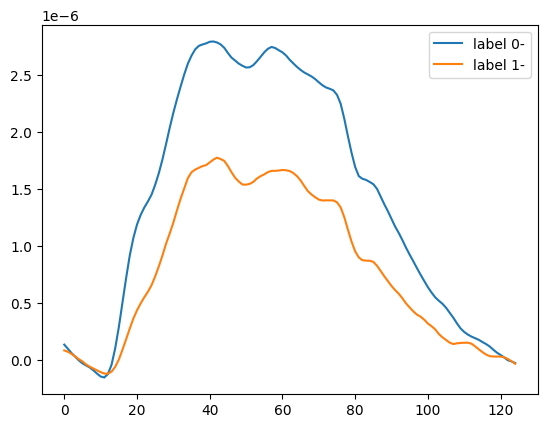

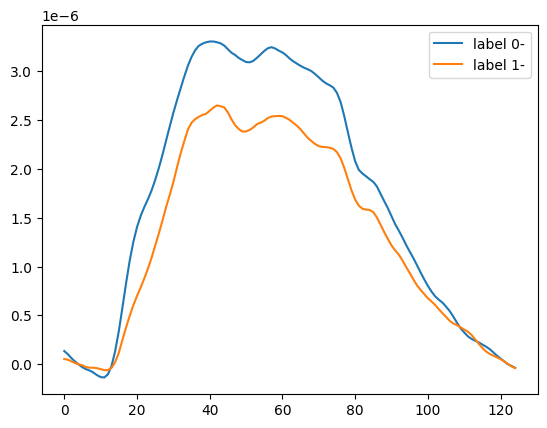

: 

In [97]:
plt.figure()
plt.plot(hbo[label_all==0].mean(axis=(0, 1)), label='label 0-')
plt.plot(hbo[label_all==1].mean(axis=(0, 1)), label='label 1-')
plt.legend()


plt.figure()
plt.plot(selected_data[selected_label==0].mean(axis=(0, 1)), label='label 0-')
plt.plot(selected_data[selected_label==1].mean(axis=(0, 1)), label='label 1-')
plt.legend()
save_fold = 'allData/diagnosis_406_less_than_threshold/' 

np.save(save_fold + 'hb_data.npy', selected_data)
np.save(save_fold + 'label.npy', selected_label)

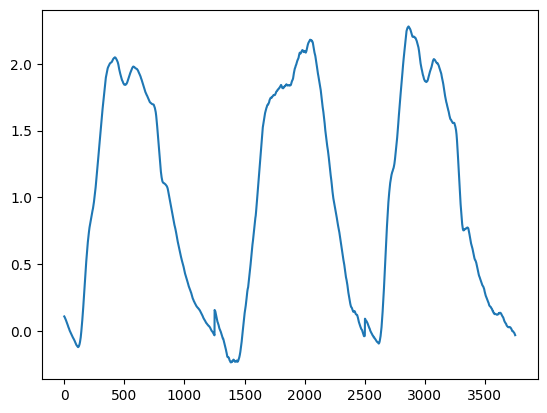

In [101]:
from scipy.stats import zscore
tmp = np.mean(hb_data_all, axis=(0,1))
plt.plot(tmp)

1.166637521014497e-06


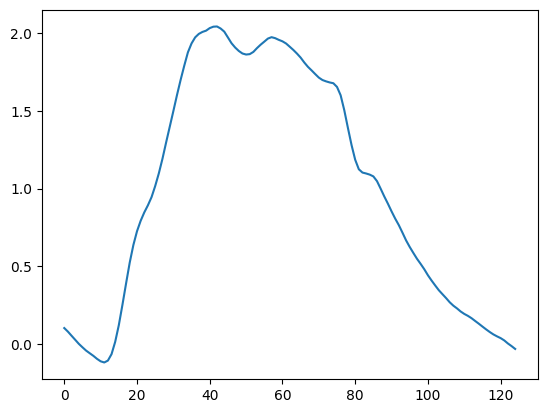

In [97]:
tmp = np.load('/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction/allData/diagnosis458/hb_data.npy')
print(np.mean(tmp))

tmp/=np.mean(tmp)

plt.plot(np.mean(tmp, axis=(0,1)))

In [53]:
a = np.arange(0, 32)
delete_index = 4
b = np.delete(a, delete_index)
print(b)

[ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


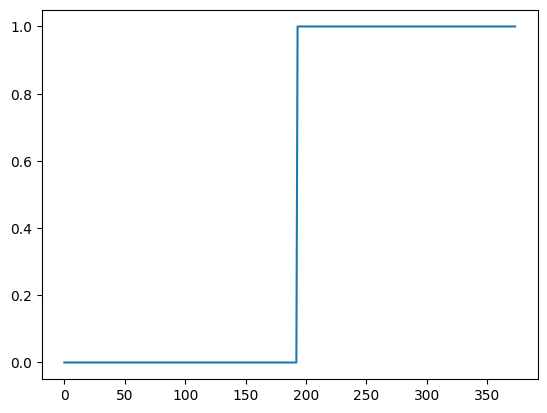

In [42]:
import matplotlib.pyplot as plt

np_all_label = np.array(label[:, 0])

plt.plot(np_all_label)